# Final Project Submission

Please fill out:
* Student name: Thiago Bassi
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import sqlite3
import matplotlib.pyplot as plt
import json
import pickle
import seaborn as sns

In [3]:
# Reading the csv and the tvs, there was ont that was need to put one enconding
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')


In [4]:
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')

In [5]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [8]:
tmdb_movies[['popularity','vote_count','original_title']]

,popularity,vote_count,original_title
0,33.533,10788,Harry Potter and the Deathly Hallows: Part 1
1,28.734,7610,How to Train Your Dragon
2,28.515,12368,Iron Man 2
3,28.005,10174,Toy Story
4,27.920,22186,Inception
...,...,...,...
26512,0.600,1,Laboratory Conditions
26513,0.600,1,_EXHIBIT_84xxx_
26514,0.600,1,The Last One
26515,0.600,1,Trailer Made


In [9]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
con = sqlite3.connect('data/im.db')
cursor_obj = con.cursor()

In [11]:

%%bash


sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [12]:
%%bash


sqlite3 data/im.db
.tables

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


In [13]:
#1.1creating the string for take the date from the tables
qr_directors = 'SELECT D.movie_id, D.person_id,B.primary_name,B.birth_year,B.death_year,B.primary_profession,A.primary_title,A.original_title,A.start_year,A.runtime_minutes,A.genres FROM directors D, persons B, movie_basics A WHERE D.person_id=B.person_id and D.movie_id=A.movie_id'
qr_principals = 'SELECT * FROM principals'
qr_known_for = 'SELECT * FROM known_for A, principals B,  persons C, movie_basics D where A.person_id = C.person_id AND A.person_id=B.person_id AND C.person_id=B.person_id AND A.movie_id=D.movie_id'
qr_persons = 'SELECT * FROM persons'
qr_writers = 'SELECT * FROM writers'


In [104]:
#creating the queries movies
qr_movie_basics = 'SELECT A.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres FROM movie_basics A , movie_akas B WHERE A.movie_id=B.movie_id'
qr_movie_akas = 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id' #
qr_movie_ratings = 'SELECT C.movie_id, C.averagerating, C.numvotes FROM movie_ratings C, movie_basics A WHERE C.movie_id=A.movie_id' #


In [105]:
#upload all the tables
tb_directors = pd.read_sql(qr_directors,con)
tb_movie_akas = pd.read_sql(qr_movie_akas,con)
tb_movie_ratings = pd.read_sql(qr_movie_ratings,con)
tb_principals = pd.read_sql(qr_principals,con)
tb_known_for = pd.read_sql(qr_known_for,con)
tb_movie_basics = pd.read_sql(qr_movie_basics,con)
tb_persons = pd.read_sql(qr_persons,con)
tb_writers = pd.read_sql(qr_writers,con)

###SANDBOX

qr_geral_people = 'SELECT * FROM tb_persons B where B.person_id ' 

tb_geral_people= pd.read_sql(qr_geral_people, con)

tb_geral_people

A tb_movie_basics A where A.movie_id (MAIN)
B tb_persons B where B.person_id (MAIN)

A - tb_movie_ratings C where C.movie_id=A.movie_id
B / A - tb_directors D where D.movie_id=A.movie_id and D.person_id=B.person_id
A - tb_movie_akas F where F.movie_id=A.movie_id
B / A - tb_principals E where E.movie_id=A.movie_id and E.person_id=B.person_id
B / A tb_writers G where G.movie_id=A.movie_id and G.person_id=B.person_id
B / A tb_known_for H where H.movie_id=A.movie_id and H.person_id=B.person_id

In [15]:
tb_movie_basics['start_year'].min()
tb_movie_basics[['numvotes','primary_title']][(tb_movie_basics['primary_title'].str.contains('Fantastic Beasts', regex=True))]


,numvotes,primary_title
33094,365353,Fantastic Beasts and Where to Find Them
43110,163151,Fantastic Beasts: The Crimes of Grindelwald


In [16]:
#tb_known_for
#tb_movie_basics.info()
#tn_movie_budgets.info()
#bom_movie_gross.info()
tb_known_for[tb_known_for['category']=='writer'].groupby('primary_name')
#write_count = tb_known_for.primary_name[tb_known_for['category']=='writer'].value_counts()
#write_count.head(20)
# tn_movie_budgets[(tn_movie_budgets.domestic_gross == '$0')].head(15)
#tn_movie_budgets['movie'][(tn_movie_budgets.domestic_gross == '$0')]
# bom_movie_gross[(bom_movie_gross.title == tn_movie_budgets['movie'][(tn_movie_budgets.domestic_gross == '$0')])]

In [17]:
genres = list(tb_movie_basics['genres'].str.split())
movie_id =  list(tb_movie_basics['movie_id'])

In [18]:
genres

[['Action,Crime,Drama'],
 ['Biography,Drama'],
 ['Drama'],
 ['Comedy,Drama'],
 ['Comedy,Drama,Fantasy'],
 ['Horror,Thriller'],
 ['Adventure,Animation,Comedy'],
 ['Drama'],
 ['History'],
 ['Documentary'],
 ['Drama'],
 ['Documentary'],
 ['Animation,Drama,History'],
 ['Drama'],
 ['Drama'],
 ['Drama,Mystery'],
 ['Action,Animation,Comedy'],
 ['Crime,Drama'],
 None,
 ['Biography,Comedy,Drama'],
 ['Documentary'],
 ['Drama'],
 ['Action,Drama'],
 ['Documentary,History'],
 ['Sci-Fi'],
 ['Comedy'],
 ['Documentary'],
 ['Thriller'],
 ['Crime,Drama'],
 None,
 ['Adventure,Animation,Sci-Fi'],
 ['Action,Crime,Drama'],
 ['Drama,Horror'],
 None,
 ['Drama,Mystery,Thriller'],
 ['Drama,Family'],
 ['Adventure,Comedy,Romance'],
 None,
 None,
 ['Comedy,Drama'],
 ['Adventure,Animation,Comedy'],
 ['Adventure,Drama,Romance'],
 ['Comedy,Crime,Drama'],
 ['Biography'],
 ['Horror'],
 ['Comedy,Drama'],
 ['Drama'],
 ['Adventure,Comedy,Drama'],
 ['Drama,Sci-Fi,Thriller'],
 ['Action'],
 ['Comedy,Drama,Romance'],
 ['Actio

In [19]:
tb_directors.loc[(tb_directors['primary_name']=='Bill Haley')]

,movie_id,person_id,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0462036,nm1940585,Bill Haley,NaN,NaN,"director,writer,producer",Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama


In [20]:
#tb_movie_akas
genres_list = list((tb_movie_basics['genres'].value_counts().index))
genres_list
tb_movie_basics['genres'].convert_dtypes()
genres_list

['Drama',
 'Documentary',
 'Comedy',
 'Horror',
 'Comedy,Drama',
 'Thriller',
 'Drama,Romance',
 'Comedy,Romance',
 'Comedy,Drama,Romance',
 'Horror,Thriller',
 'Drama,Thriller',
 'Action',
 'Romance',
 'Biography,Documentary',
 'Documentary,Drama',
 'Documentary,Music',
 'Comedy,Horror',
 'Action,Crime,Drama',
 'Crime,Drama,Thriller',
 'Crime,Drama',
 'Family',
 'Biography,Documentary,History',
 'Drama,Family',
 'Documentary,History',
 'Action,Drama',
 'Horror,Mystery,Thriller',
 'Biography,Documentary,Drama',
 'Drama,Horror,Thriller',
 'Animation',
 'Action,Thriller',
 'Action,Comedy',
 'Documentary,Sport',
 'Comedy,Drama,Family',
 'Drama,Mystery,Thriller',
 'Sci-Fi',
 'Crime',
 'Action,Adventure,Comedy',
 'Biography,Drama',
 'Biography,Documentary,Music',
 'Action,Crime,Thriller',
 'Adventure,Animation,Comedy',
 'Action,Drama,Thriller',
 'Comedy,Crime,Drama',
 'Action,Comedy,Crime',
 'Drama,Horror,Mystery',
 'Documentary,News',
 'Drama,History',
 'Crime,Drama,Mystery',
 'Drama,Myste

In [21]:
tb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [22]:
tb_movie_basics['split_genres'] = tb_movie_basics['genres'].str.split(",")

In [23]:
tb_movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,split_genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119,"[Comedy, Drama, Fantasy]"
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32,"[Horror, Thriller]"
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263,"[Adventure, Animation, Comedy]"
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,tt0146592,6.8,451,[Drama]
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,tt0154039,4.6,64,[History]
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,tt0159369,7.6,53,[Documentary]


In [24]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [25]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [26]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.strip('$'))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: x.strip('$'))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$'))

In [28]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: float(x.replace(",", "")))

In [29]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [30]:
tn_movie_budgets['foreign_gross'] = tn_movie_budgets['worldwide_gross']-tn_movie_budgets['domestic_gross']

In [31]:
movie_budgets_gr10M = tn_movie_budgets[tn_movie_budgets['production_budget'] > 10000000.0]

In [32]:
movie_budgets_le10M = tn_movie_budgets[tn_movie_budgets['production_budget'] < 10000000.0]

In [33]:
cheap_movies_nonzero = movie_budgets_le10M.loc[(tn_movie_budgets['domestic_gross']!=0)]



In [34]:
cheap_movies_nonzero

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
3747,48,"Sep 22, 2017",Friend Request,9900000.0,3759078.0,11310835.0,7551757.0
3748,49,"Apr 30, 2010",Gunless,9900000.0,458054.0,458054.0,0.0
3749,50,"Apr 3, 2009",Adventureland,9800000.0,16044025.0,17553055.0,1509030.0
3750,51,"Dec 19, 2012",Amour,9700000.0,6738954.0,36787044.0,30048090.0
3751,52,"Apr 28, 2006",The Lost City,9600000.0,2484186.0,5256839.0,2772653.0
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000.0,70071.0,71644.0,1573.0
5776,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,900.0,0.0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,192013.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0


In [35]:
cheap_movies_nonzero.sort_values(by = 'total_profit', ascending = False)

KeyError: 'total_profit'

In [36]:
tn_movie_budgets['domestic_profit'] = tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

In [37]:
tn_movie_budgets['total_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

In [38]:
tn_movie_budgets.rename(columns = {'total profit': "total_profit"}, inplace = True)

In [39]:
tn_movie_budgets.rename(columns = {'domestic profit': "domestic_profit"},inplace = True)

In [40]:
#converting to datetime and removing movies before 2010
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

In [41]:
tn_movie_budgets.set_index('release_date', inplace=True)

In [42]:
tn_movie_budgets.sort_index().loc['01-01-2010':'12-31-2022']

,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,total_profit
release_date,,,,,,,,
2010-01-08,13,Youth in Revolt,18000000.0,15285588.0,19685588.0,4400000.0,-2714412.0,1685588.0
2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,6700000.0,6918920.0,13618920.0
2010-01-08,67,Daybreakers,20000000.0,30101577.0,51445503.0,21343926.0,10101577.0,31445503.0
2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,22445752.0,-3692894.0,18752858.0
2010-01-15,36,Fish Tank,3000000.0,374675.0,5922292.0,5547617.0,-2625325.0,2922292.0
...,...,...,...,...,...,...,...,...
2019-12-31,30,Reagan,25000000.0,0.0,0.0,0.0,-25000000.0,-25000000.0
2019-12-31,13,Rogue City,13000000.0,0.0,0.0,0.0,-13000000.0,-13000000.0
2020-02-21,36,Call of the Wild,82000000.0,0.0,0.0,0.0,-82000000.0,-82000000.0


In [55]:
recent_movie_budgets = tn_movie_budgets.sort_index().loc['01-01-2010':'12-31-2022']

In [56]:
recent_movies_budgets_nonzero = recent_movie_budgets.loc[(recent_movie_budgets['domestic_gross']!=0)]

<Axes: xlabel='production_budget', ylabel='domestic_profit'>

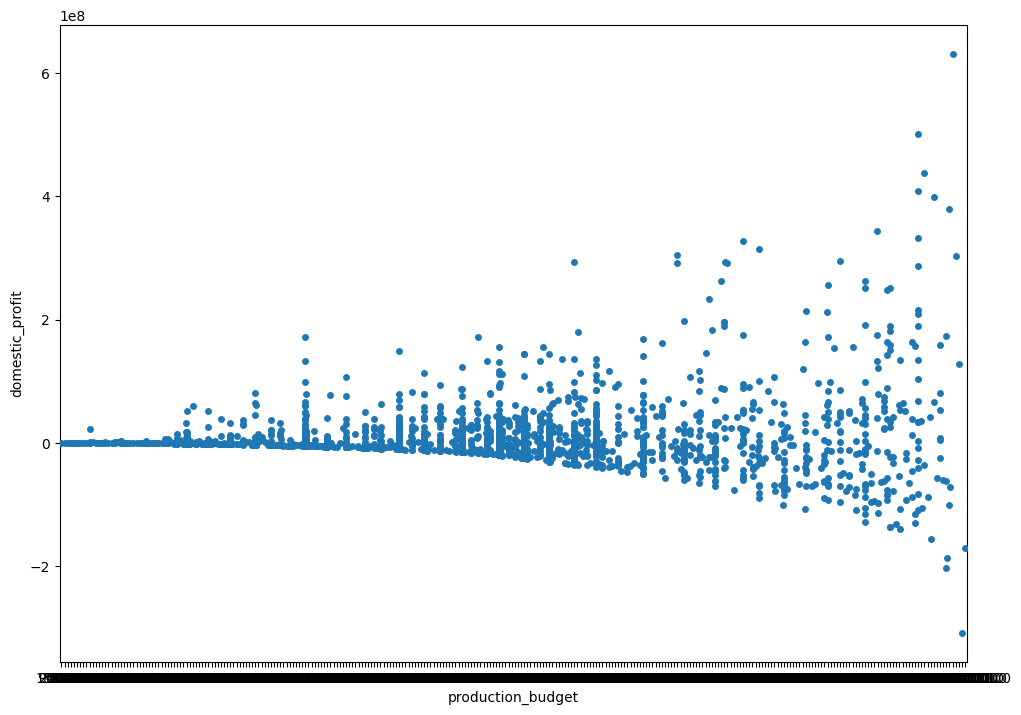

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'production_budget', y = 'domestic_profit', data = recent_movies_budgets_nonzero, ax = ax)
# sns.boxplot(x = 'production_budget', y = 'worldwide_gross', data = movie_budgets_nonzero, ax = ax)

# plt.show()

In [58]:
recent_movies_budgets_nonzero

,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,total_profit,profit_per_prod_dol
release_date,,,,,,,,,
2010-01-08,13,Youth in Revolt,18000000.0,15285588.0,19685588.0,4400000.0,-2714412.0,1685588.0,0.093644
2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,6700000.0,6918920.0,13618920.0,0.716785
2010-01-08,67,Daybreakers,20000000.0,30101577.0,51445503.0,21343926.0,10101577.0,31445503.0,1.572275
2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,22445752.0,-3692894.0,18752858.0,0.669745
2010-01-15,36,Fish Tank,3000000.0,374675.0,5922292.0,5547617.0,-2625325.0,2922292.0,0.974097
...,...,...,...,...,...,...,...,...,...
2019-06-07,81,The Secret Life of Pets 2,80000000.0,63795655.0,113351496.0,49555841.0,-16204345.0,33351496.0,0.416894
2019-06-07,3,Dark Phoenix,350000000.0,42762350.0,149762350.0,107000000.0,-307237650.0,-200237650.0,-0.572108
2019-06-07,35,Late Night,4000000.0,246305.0,246305.0,0.0,-3753695.0,-3753695.0,-0.938424


In [59]:
tn_movie_budgets['profit_per_prod_dol'] = (tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget'])/tn_movie_budgets['production_budget']

In [60]:
recent_movies_budgets_nonzero.reset_index()

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,total_profit,profit_per_prod_dol
0,2010-01-08,13,Youth in Revolt,18000000.0,15285588.0,19685588.0,4400000.0,-2714412.0,1685588.0,0.093644
1,2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,6700000.0,6918920.0,13618920.0,0.716785
2,2010-01-08,67,Daybreakers,20000000.0,30101577.0,51445503.0,21343926.0,10101577.0,31445503.0,1.572275
3,2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,22445752.0,-3692894.0,18752858.0,0.669745
4,2010-01-15,36,Fish Tank,3000000.0,374675.0,5922292.0,5547617.0,-2625325.0,2922292.0,0.974097
...,...,...,...,...,...,...,...,...,...,...
1782,2019-06-07,81,The Secret Life of Pets 2,80000000.0,63795655.0,113351496.0,49555841.0,-16204345.0,33351496.0,0.416894
1783,2019-06-07,3,Dark Phoenix,350000000.0,42762350.0,149762350.0,107000000.0,-307237650.0,-200237650.0,-0.572108
1784,2019-06-07,35,Late Night,4000000.0,246305.0,246305.0,0.0,-3753695.0,-3753695.0,-0.938424
1785,2019-06-14,98,Shaft,30000000.0,600000.0,600000.0,0.0,-29400000.0,-29400000.0,-0.980000


In [61]:
recent_movies_budgets_nonzero.sort_values(by = 'profit_per_prod_dol', ascending = False).head(20)

,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,total_profit,profit_per_prod_dol
release_date,,,,,,,,,
2015-07-10,80,The Gallows,100000.0,22764410.0,41656474.0,18892064.0,22664410.0,41556474.0,415.564740
2012-01-06,12,The Devil Inside,1000000.0,53262945.0,101759490.0,48496545.0,52262945.0,100759490.0,100.759490
2011-04-01,63,Insidious,1500000.0,54009150.0,99870886.0,45861736.0,52509150.0,98370886.0,65.580591
2015-04-17,14,Unfriended,1000000.0,32789645.0,64364198.0,31574553.0,31789645.0,63364198.0,63.364198
2010-10-20,65,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,92759125.0,81752907.0,174512032.0,58.170677
2017-01-20,50,Split,5000000.0,138141585.0,278964806.0,140823221.0,133141585.0,273964806.0,54.792961
2014-03-21,90,Godâs Not Dead,1150000.0,60755732.0,63777092.0,3021360.0,59605732.0,62627092.0,54.458341
2017-02-24,49,Get Out,5000000.0,176040665.0,255367951.0,79327286.0,171040665.0,250367951.0,50.073590
2012-05-25,18,Les Intouchables,10800000.0,13182281.0,484873045.0,471690764.0,2382281.0,474073045.0,43.895652


In [62]:
movie_budgets_gr1M = recent_movies_budgets_nonzero[recent_movies_budgets_nonzero['production_budget'] > 1000000.0]

In [63]:
# recent_movies_budgets_nonzero['production_budget'] > 100000000)sort_values(by = 'production_budget', ascending = False).head(20)
movie_budgets_gr10M = recent_movies_budgets_nonzero[recent_movies_budgets_nonzero['production_budget'] > 10000000.0]

In [64]:
movie_budgets_gr100M = recent_movies_budgets_nonzero[recent_movies_budgets_nonzero['production_budget'] > 100000000.0]

In [65]:
recent_movies_budgets_nonzero.sort_values(by = 'profit_per_prod_dol', ascending = False).head(20)

,id,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,total_profit,profit_per_prod_dol
release_date,,,,,,,,,
2015-07-10,80,The Gallows,100000.0,22764410.0,41656474.0,18892064.0,22664410.0,41556474.0,415.564740
2012-01-06,12,The Devil Inside,1000000.0,53262945.0,101759490.0,48496545.0,52262945.0,100759490.0,100.759490
2011-04-01,63,Insidious,1500000.0,54009150.0,99870886.0,45861736.0,52509150.0,98370886.0,65.580591
2015-04-17,14,Unfriended,1000000.0,32789645.0,64364198.0,31574553.0,31789645.0,63364198.0,63.364198
2010-10-20,65,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,92759125.0,81752907.0,174512032.0,58.170677
2017-01-20,50,Split,5000000.0,138141585.0,278964806.0,140823221.0,133141585.0,273964806.0,54.792961
2014-03-21,90,Godâs Not Dead,1150000.0,60755732.0,63777092.0,3021360.0,59605732.0,62627092.0,54.458341
2017-02-24,49,Get Out,5000000.0,176040665.0,255367951.0,79327286.0,171040665.0,250367951.0,50.073590
2012-05-25,18,Les Intouchables,10800000.0,13182281.0,484873045.0,471690764.0,2382281.0,474073045.0,43.895652


In [258]:
tb_movie_akas.title.str.contains('Jodaeiye').value_counts()

False    261804
True          2
Name: title, dtype: int64

In [68]:
tb_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title,movie_id,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0,tt0369610,7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,tt0369610,7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0,tt0369610,7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0,tt0369610,7.0,539338
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,tt0369610,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9726638,2,Monkey King: The Volcano,None,None,original,None,1.0,tt9726638,6.0,6
261802,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0,tt9726638,6.0,6
261803,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0,tt9827784,7.7,6
261804,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0,tt9827784,7.7,6


In [ ]:
df = pd.DataFrame([
    (1, '2015', 10, 'A1'),
    (2, '2015', 30, 'A2'),
    (3, '2017', 35, 'A4'),
    (4, '2022', 45, 'A2'),
    (5, '2021', 44, 'A3'),
    (6, '2020', 50, 'A3'),
    ], columns=['No.', 'Year', 'Marks', 'Assignment'])
# print DataFrame on console
print(df)
tb_movie_akas['title'] = tb_movie_akas.groupby(['movie_id'])['Assignment'
        ].transform(lambda x: ' '.join(x))
# it will remove redundent entries
df = df.drop_duplicates()

In [119]:
# tb_movie_akas.reset_index()
# tb_movie_akas.movie_id.duplicated
# tb_movie_akas.drop(tb_movie_akas.columns[8], axis = 1)
# tb_movie_akas.drop(tb_movie_akas.iloc[:, 8:9],axis = 1)
# tb_movie_akas['all_titles'] = list(tb_movie_akas.groupby(['movie_id'])['title'].transform(lambda x: ','.join(x)))
tb_movie_akas['all_titles'] = list(tb_movie_akas['all_titles'])

In [134]:
tb_movie_akas[tb_movie_akas['movie_id'] == 'tt0369610']['all_titles'][0]

"Джурасик свят,Jurashikku warudo,Jurassic World: O Mundo dos Dinossauros,O Mundo dos Dinossauros,Jurassic World,Jurassic World,Jurassic World,Jurski svijet,Olam ha'Yura,Jurassic World: Mundo Jurásico,Jurassic World: Sauruste maailm,Jurassic World,Jurassic World 3D,Jurassic World 3D,Jurassic World 3D,Juras laikmeta pasaule,Mundo Jurássico,Мир Юрского периода,Jurský svět,Monde jurassique,Jurassic World,Ebb Tide,Jurassic World: Mundo Jurásico,Jurassic World,Juros periodo pasaulis,Jurassic World,Jurassic World: Mundo jurásico,Jurassic Park 4,Jurassic Park IV,Jurassic World,Jurski svet,Свiт Юрського перiоду,The Gioi Khung Long,Jurassic World,Svet iz doba jure,Jurský svet,Jurassic World,Jurassic Park 4,Jurassic World,Jurassic World,Jurassic World,Park jurajski 4,Yur dövrü Dünyasi,Iuruli periodis samyaro,Jurassic World,Mundo Jurásico,Jurassic World 3D,Jurassic World - Mundo Jurásico"

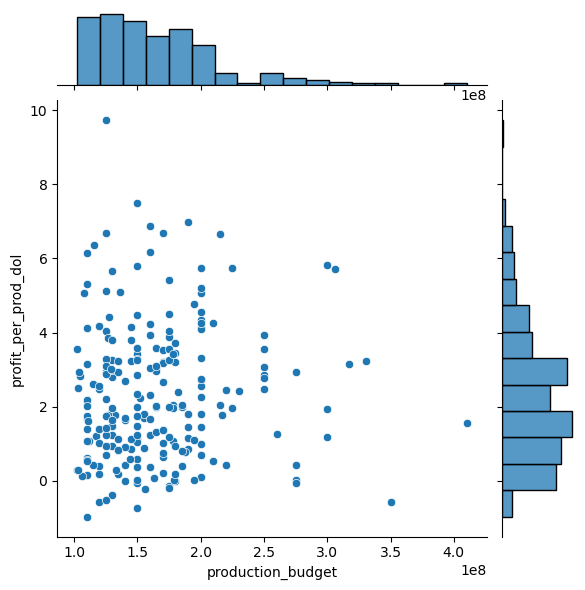

In [240]:
sns.jointplot(x = 'production_budget', y = 'profit_per_prod_dol', data = movie_budgets_gr100M)
plt.show()

In [69]:
tb_directors['director_name'] = tb_directors
tb_directors['movie_directed'] = tb_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248
